# Time Series Week 4 - Assignment

## 1. Modeling Seasonal Variations

### 1.1. Visualization for Item Sales Data
**Task:** Visualize the item sales data to identify trends and seasonal variations


In [53]:
# Load the sales dataset and understand its characteristics
# Google Mount
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.stats.stattools import durbin_watson

# The data contatins daily sales of 50 items in 10 stores from a period of 5 years (500 different time series in total.)
df = pd.read_csv('/content/drive/Shared drives/timeseries-datasets/Energy_Consumption_Data_2010_2020.csv')
df.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Dates            4018 non-null   object
 1   Energy_Consumed  4018 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 62.9+ KB


In [54]:
print(df.columns)

Index(['Dates', 'Energy_Consumed'], dtype='object')


In [55]:
# Ensure the Dates are in datetime format and use the column as an index in your dateset


df['Dates'] = pd.to_datetime(df['Dates'])  # 날짜 형식으로 변환
print(df.columns)
print(df.info())
df.set_index('Dates', inplace=True)  # 'Dates' 열을 인덱스로 설정

Index(['Dates', 'Energy_Consumed'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Dates            4018 non-null   datetime64[ns]
 1   Energy_Consumed  4018 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 62.9 KB
None


In [56]:
# Define the target variable (y)
y = df['Energy_Consumed']

y_to_train = y.iloc[:len(y)-731]  # 마지막 730일을 제외한 나머지를 훈련 데이터로
y_to_test = y.iloc[len(y)-731:]   # 마지막 730일을 테스트 데이터로

print("the number of train data :" + str(len(y_to_train)))
print("the number of test data :" + str(len(y_to_test)))
# Split the dataset to training and test set (leave 2 years for testing)

the number of train data :3287
the number of test data :731


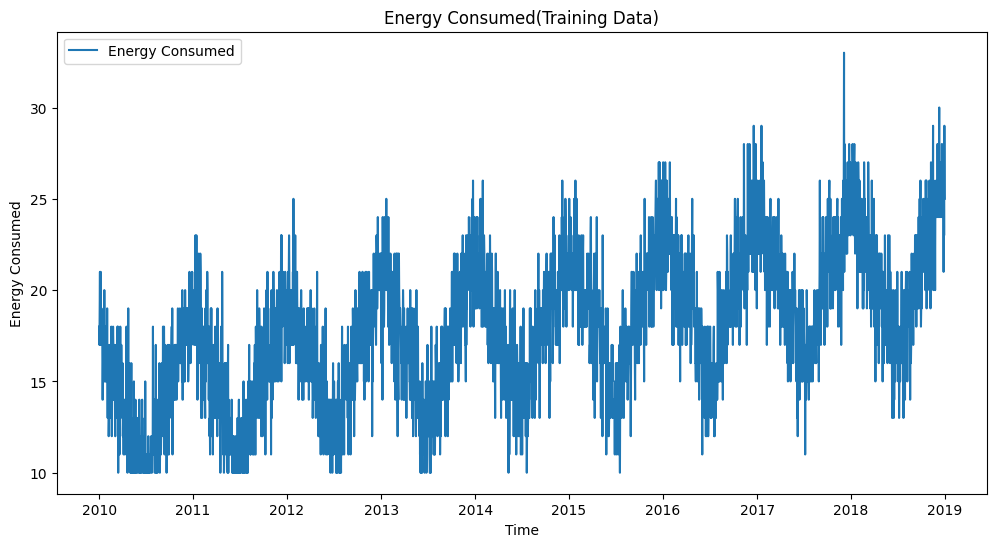

In [57]:
# Plot the training data and analyze the visual trends and seasonality
import matplotlib.pyplot as plt

# y_to_train visualization
plt.figure(figsize=(12, 6))
plt.plot(y_to_train.index, y_to_train.values, label='Energy Consumed')

# 그래프의 제목 및 라벨 설정
plt.title('Energy Consumed(Training Data)')
plt.xlabel('Time')  # x축 라벨을 'Time'으로 설정
plt.ylabel('Energy Consumed')
plt.legend()

# 그래프 출력
plt.show()

### 1.2. Trend Linear Modeling
**Task:** Fit a linear model to the sales data to capture the overall trend

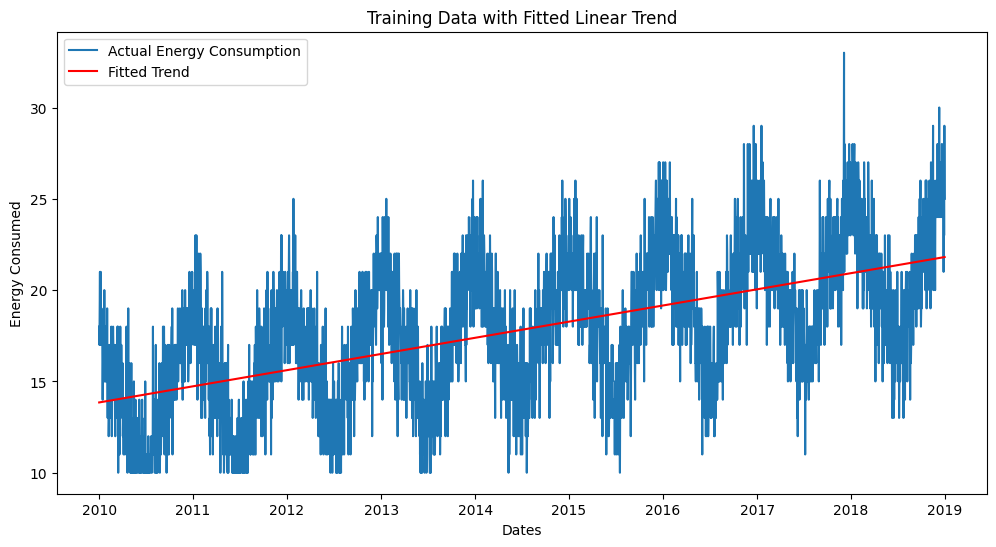

In [58]:
# Define the feature (X) and target (y) variables that you will use to plot the trend line

# Fit and predict the model on the features

# Plot the actual sales data and the fitted linear trend
X_train_trend = np.arange(len(y_to_train)).reshape(-1, 1)  # 인덱스를 X로 사용
y_train_trend = y_to_train.values

# Linear Regression 모델 생성 및 학습
trend_model = LinearRegression()
trend_model.fit(X_train_trend, y_train_trend)  # X와 y로 모델 학습
TRt_train = trend_model.predict(X_train_trend)  # 학습된 모델로 예측

plt.figure(figsize=(12, 6))

plt.plot(y_to_train.index, y_to_train.values, label='Actual Energy Consumption')

# 예측된 추세선 그래프 (선형 회귀 결과)
plt.plot(y_to_train.index, TRt_train, label='Fitted Trend', color='red')

plt.title('Training Data with Fitted Linear Trend')
plt.xlabel('Dates')
plt.ylabel('Energy Consumed')

plt.legend()
plt.show()


### 1.3. Seasonality Modeling - Binary Variable Models
**Task:** Model seasonality using binary (dummy) variables

In [59]:
y_to_train.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4018 entries, 2010-01-01 to 2020-12-31
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Energy_Consumed  4018 non-null   int64
dtypes: int64(1)
memory usage: 62.8 KB


In [60]:
# Create a separate dataset for binary seasonality modeling

# Define the time index (t), constant and extract month variable from the data

# Create month dummy variables
df_train_bi = y_to_train.to_frame()
df_train_bi['t'] = np.arange(1, len(df_train_bi) + 1)
df_train_bi['constant']=1
df_train_bi['month'] = df_train_bi.index.month
df_train_bi = pd.get_dummies(df_train_bi, columns=['month'], drop_first=False)
# Remove the January column
df_train_bi.drop(columns=['month_1'], inplace=True)
# Display the information of the columns
df_train_bi.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3287 entries, 2010-01-01 to 2018-12-31
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Energy_Consumed  3287 non-null   int64
 1   t                3287 non-null   int64
 2   constant         3287 non-null   int64
 3   month_2          3287 non-null   bool 
 4   month_3          3287 non-null   bool 
 5   month_4          3287 non-null   bool 
 6   month_5          3287 non-null   bool 
 7   month_6          3287 non-null   bool 
 8   month_7          3287 non-null   bool 
 9   month_8          3287 non-null   bool 
 10  month_9          3287 non-null   bool 
 11  month_10         3287 non-null   bool 
 12  month_11         3287 non-null   bool 
 13  month_12         3287 non-null   bool 
dtypes: bool(11), int64(3)
memory usage: 138.0 KB


In [61]:
# Split the data into features(X) and target variable (y)
X_train_seasonal_binary = df_train_bi.drop(columns=['Energy_Consumed'])  # 독립 변수 (특성)
y_train_seasonal_binary = df_train_bi['Energy_Consumed']

print("X_train_seasonal_binary :")
print(X_train_seasonal_binary)
print("y_train_seasonal_binary :")
print(y_train_seasonal_binary)

X_train_seasonal_binary :
               t  constant  month_2  month_3  month_4  month_5  month_6  \
Dates                                                                     
2010-01-01     1         1    False    False    False    False    False   
2010-01-02     2         1    False    False    False    False    False   
2010-01-03     3         1    False    False    False    False    False   
2010-01-04     4         1    False    False    False    False    False   
2010-01-05     5         1    False    False    False    False    False   
...          ...       ...      ...      ...      ...      ...      ...   
2018-12-27  3283         1    False    False    False    False    False   
2018-12-28  3284         1    False    False    False    False    False   
2018-12-29  3285         1    False    False    False    False    False   
2018-12-30  3286         1    False    False    False    False    False   
2018-12-31  3287         1    False    False    False    False    False   

In [62]:
# Fit a linear regression model that includes both the trend (time) and binary variables to model seasonality
seasonal_model_binary = LinearRegression()
seasonal_model_binary.fit(X_train_seasonal_binary, y_train_seasonal_binary)
SNt_train_binary = seasonal_model_binary.predict(X_train_seasonal_binary)

# Output regression coefficients
coefficients = seasonal_model_binary.coef_
intercept = seasonal_model_binary.intercept_

print("Intercept:", intercept)
print("Coefficients:")
for col, coef in zip(X_train_seasonal_binary.columns, coefficients):
    print(f"{col}: {coef}")

Intercept: 17.689607339894756
Coefficients:
t: 0.0024210525665919933
constant: -6.314393452555578e-16
month_2: -1.9786553149301631
month_3: -3.0501901489526917
month_4: -4.182455191301836
month_5: -5.92905715121373
month_6: -7.704213471938048
month_7: -7.965630246664725
month_8: -6.0908620876986115
month_9: -4.119542900657085
month_10: -2.908797190318065
month_11: -2.0598196998117873
month_12: -0.017054873582684177


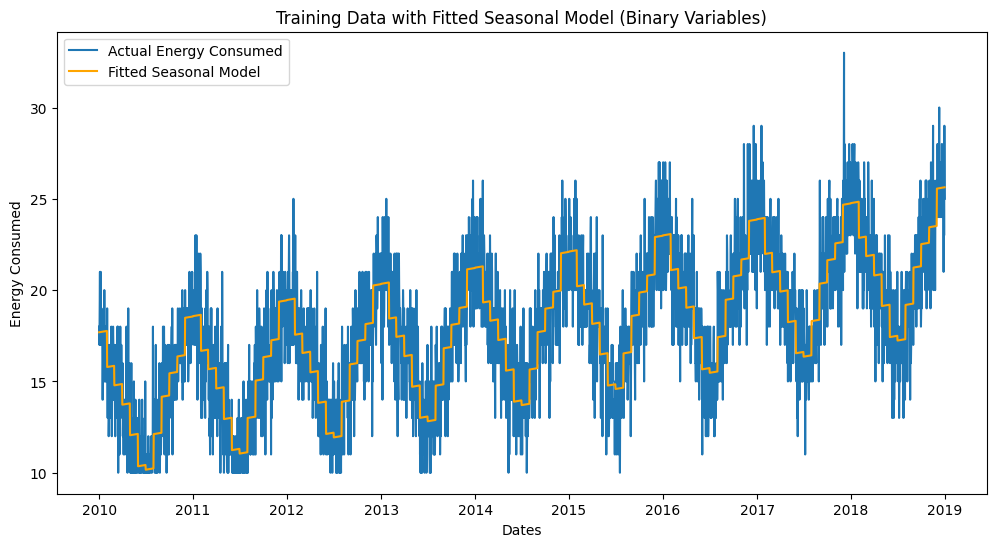

In [63]:
# Plot the results and compare with the raw data
plt.figure(figsize=(12, 6))

# 실제 에너지 소비량
plt.plot(df_train_bi.index, y_to_train.values, label='Actual Energy Consumed')
plt.plot(df_train_bi.index, SNt_train_binary, label='Fitted Seasonal Model', color='orange')

plt.title('Training Data with Fitted Seasonal Model (Binary Variables)')
plt.xlabel('Dates')
plt.ylabel('Energy Consumed')
plt.legend()
plt.show()

### 1.4. Seasonality Modeling - Trigonometric Models
**Task:** Model seasonality using trigonometric functions (sine and cosine)

In [64]:
# Create a separate dataset for trigonometric seasonality modeling
df_train_tri = y_to_train.to_frame()
df_train_tri['t'] = np.arange(1, len(df_train_tri) + 1)
df_train_tri['constant']=1
df_train_tri['month'] = df_train_tri.index.month
# Define the time index (t) and constant

# Define the period of seasonality (L)
L = 30
df_train_tri['(sin2pi)/L'] = np.sin(2 * np.pi * df_train_tri['t'] / L)
df_train_tri['(cos2pi)/L'] = np.cos(2 * np.pi * df_train_tri['t'] / L)
df_train_tri['(sin4pi)/L'] = np.sin(4 * np.pi * df_train_tri['t'] / L)
df_train_tri['(cos4pi)/L'] = np.cos(4 * np.pi * df_train_tri['t'] / L)

df_train_tri.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3287 entries, 2010-01-01 to 2018-12-31
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Energy_Consumed  3287 non-null   int64  
 1   t                3287 non-null   int64  
 2   constant         3287 non-null   int64  
 3   month            3287 non-null   int32  
 4   (sin2pi)/L       3287 non-null   float64
 5   (cos2pi)/L       3287 non-null   float64
 6   (sin4pi)/L       3287 non-null   float64
 7   (cos4pi)/L       3287 non-null   float64
dtypes: float64(4), int32(1), int64(3)
memory usage: 218.3 KB


In [65]:
# Split the data into features(X) and target variable (y)
X_train_seasonal_tri = df_train_tri.drop(columns=['Energy_Consumed'])
y_train_seasonal_tri = df_train_tri['Energy_Consumed']


print("X_train_seasonal_tri :")
print(X_train_seasonal_tri)
print("y_train_seasonal_tri :")
print(y_train_seasonal_tri)

# Train regression model
seasonal_model_tri = LinearRegression()
seasonal_model_tri.fit(X_train_seasonal_tri, y_train_seasonal_tri)
STT_train_binary = seasonal_model_tri.predict(X_train_seasonal_tri)


X_train_seasonal_tri :
               t  constant  month    (sin2pi)/L  (cos2pi)/L    (sin4pi)/L  \
Dates                                                                       
2010-01-01     1         1      1  2.079117e-01    0.978148  4.067366e-01   
2010-01-02     2         1      1  4.067366e-01    0.913545  7.431448e-01   
2010-01-03     3         1      1  5.877853e-01    0.809017  9.510565e-01   
2010-01-04     4         1      1  7.431448e-01    0.669131  9.945219e-01   
2010-01-05     5         1      1  8.660254e-01    0.500000  8.660254e-01   
...          ...       ...    ...           ...         ...           ...   
2018-12-27  3283         1     12  4.067366e-01   -0.913545 -7.431448e-01   
2018-12-28  3284         1     12  2.079117e-01   -0.978148 -4.067366e-01   
2018-12-29  3285         1     12  8.721590e-14   -1.000000 -1.744318e-13   
2018-12-30  3286         1     12 -2.079117e-01   -0.978148  4.067366e-01   
2018-12-31  3287         1     12 -4.067366e-01   -0.

In [66]:
# Fit a linear regression model that includes both the trend (time) and binary variables to model seasonality

# Output regression coefficients
tri_coefficients = seasonal_model_tri.coef_
tri_intercept = seasonal_model_tri.intercept_

print("Intercept:", tri_intercept)
print("Coefficients:")
for col, coef in zip(X_train_seasonal_tri.columns, tri_coefficients):
    print(f"{col}: {coef}")

Intercept: 13.836241978294199
Coefficients:
t: 0.0024219951763565398
constant: 2.168404344971009e-18
month: 0.0017309892114685738
(sin2pi)/L: 0.026994330058900912
(cos2pi)/L: 0.04175939189220376
(sin4pi)/L: -0.03231337247084048
(cos4pi)/L: 0.01836562287095772


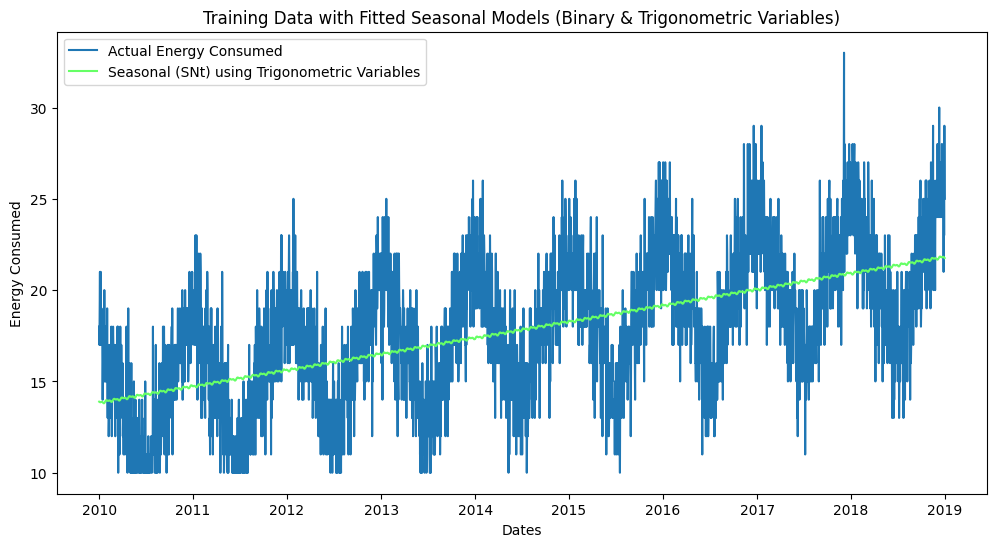

In [67]:
# Plot the results and compare with the raw data

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(df_train_tri.index, y_to_train.values, label='Actual Energy Consumed')
plt.plot(df_train_tri.index, STT_train_binary, label='Seasonal (SNt) using Trigonometric Variables', color=(0.4, 1.0, 0.4))
plt.title('Training Data with Fitted Seasonal Models (Binary & Trigonometric Variables)')
plt.xlabel('Dates')
plt.ylabel('Energy Consumed')

plt.legend()
plt.show()

### 1.5. Durbin-Watson Test for Autocorrelation Check for Residuals
**Task:** Check for autocorrelation in the residuals using the Durbin-Watson test

In [68]:
# Calculate the residuals of the actual values vs the two seasonal components (Binary and Trigonometric)
seasonal_binary_residual = np.ravel((y_to_train.values - SNt_train_binary))
seasonal_tri_residual = np.ravel((y_to_train.values - STT_train_binary))

# Calculate Durbin-Watson test statistic
dw_binary_test = durbin_watson(seasonal_binary_residual)
dw_tri_test = durbin_watson(seasonal_tri_residual)

# Print the results
print("Durbin-Watson Test Statistic for Seasonal Binary Model:", dw_binary_test)
print("Durbin-Watson Test Statistic for Seasonal Trigonometric Model:", dw_tri_test)

Durbin-Watson Test Statistic for Seasonal Binary Model: 2.0303756664508126
Durbin-Watson Test Statistic for Seasonal Trigonometric Model: 0.7525632716083376


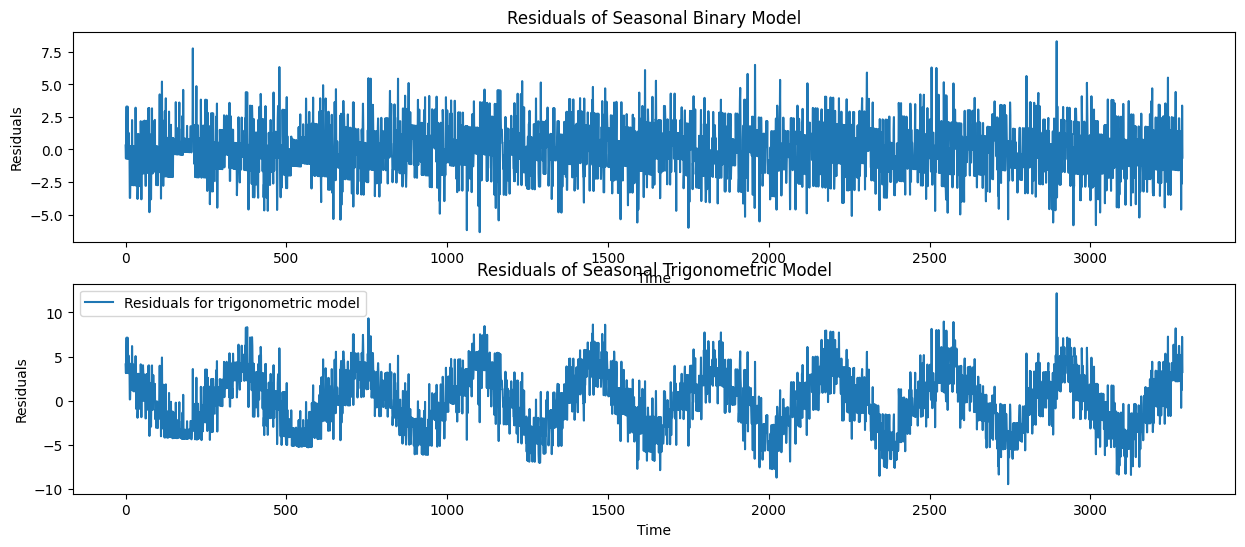

In [69]:
# 이진모델과 삼각함수 모델의 차이를 보기 위한 그래프(과제 아님 혼자 공부하라고 만듬)


plt.figure(figsize=(15, 6))
plt.subplot(2,1,1)
plt.plot(seasonal_binary_residual, label='Residuals for binary variable model')
plt.title('Residuals of Seasonal Binary Model')
plt.xlabel('Time')
plt.ylabel('Residuals')

plt.subplot(2,1,2)
plt.plot(seasonal_tri_residual, label='Residuals for trigonometric model')

plt.title('Residuals of Seasonal Trigonometric Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.show()

### 1.6 Evaluation on Test Dataset
**Task:** Repeat the above tasks on test dataset and evaluate the models created for the seasonality components using MSE

In [78]:
from sklearn.metrics import mean_squared_error
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_acf

In [84]:
# Create a separate dataset for binary seasonality modeling
y_to_train2 = y.iloc[len(y)-731:]
df_train_bi = y_to_train2.to_frame()
df_train_bi.index = pd.to_datetime(df_train_bi.index)
# Define the time index (t), constant and extract month variable from the data
# 't'와 'constant' 열 추가
df_train_bi['t'] = np.arange(1, len(df_train_bi) + 1)
df_train_bi['constant'] = 1

# 인덱스에서 월(month) 정보 추출하여 이진 변수(dummy variables) 생성
df_train_bi['month'] = df_train_bi.index.month
df_train_bi = pd.get_dummies(df_train_bi, columns=['month'], drop_first=False)
df_train_bi.drop(columns=['month_1'], inplace=True)


df_train_bi.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2019-01-01 to 2020-12-31
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Energy_Consumed  731 non-null    int64
 1   t                731 non-null    int64
 2   constant         731 non-null    int64
 3   month_2          731 non-null    bool 
 4   month_3          731 non-null    bool 
 5   month_4          731 non-null    bool 
 6   month_5          731 non-null    bool 
 7   month_6          731 non-null    bool 
 8   month_7          731 non-null    bool 
 9   month_8          731 non-null    bool 
 10  month_9          731 non-null    bool 
 11  month_10         731 non-null    bool 
 12  month_11         731 non-null    bool 
 13  month_12         731 non-null    bool 
dtypes: bool(11), int64(3)
memory usage: 30.7 KB


In [85]:
# Split the data into features(X) and target variable (y)
X_train_seasonal_binary = df_train_bi.drop(columns=['Energy_Consumed'])  # 독립 변수 (특성)
y_train_seasonal_binary = df_train_bi['Energy_Consumed']

In [86]:
#Create a separate dataset for trigonometric seasonality modeling
df_train_tri = y_to_train2.to_frame()
df_train_tri['t'] = np.arange(1, len(df_train_tri) + 1)
df_train_tri['constant']=1
df_train_tri['month'] = df_train_tri.index.month
# Define the time index (t) and constant

# Define the period of seasonality (L)
L = 30
df_train_tri['(sin2pi)/L'] = np.sin(2 * np.pi * df_train_tri['t'] / L)
df_train_tri['(cos2pi)/L'] = np.cos(2 * np.pi * df_train_tri['t'] / L)
df_train_tri['(sin4pi)/L'] = np.sin(4 * np.pi * df_train_tri['t'] / L)
df_train_tri['(cos4pi)/L'] = np.cos(4 * np.pi * df_train_tri['t'] / L)
df_train_tri.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2019-01-01 to 2020-12-31
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Energy_Consumed  731 non-null    int64  
 1   t                731 non-null    int64  
 2   constant         731 non-null    int64  
 3   month            731 non-null    int32  
 4   (sin2pi)/L       731 non-null    float64
 5   (cos2pi)/L       731 non-null    float64
 6   (sin4pi)/L       731 non-null    float64
 7   (cos4pi)/L       731 non-null    float64
dtypes: float64(4), int32(1), int64(3)
memory usage: 48.5 KB


In [87]:
# Split the data into features(X) and target variable (y)
X_train_seasonal_tri = df_train_tri.drop(columns=['Energy_Consumed'])
y_train_seasonal_tri = df_train_tri['Energy_Consumed']

In [88]:
# Evaluate the two models using Mean Squared Error (MSE) on the test dataset
seasonal_binary_train = seasonal_model_binary.predict(X_train_seasonal_binary)
seasonal_tri_train = seasonal_model_tri.predict(X_train_seasonal_tri)


# Mean Squared Error 계산
mse_binary = mean_squared_error(y_train_seasonal_binary, seasonal_binary_train)
mse_trig = mean_squared_error(y_train_seasonal_tri, seasonal_tri_train)

# 결과 출력
print(f"Mean Squared Error (Binary Variables): {mse_binary}")
print(f"Mean Squared Error (Trigonometric): {mse_trig}")

Mean Squared Error (Binary Variables): 67.94567710095076
Mean Squared Error (Trigonometric): 75.52404694755124


## 2. Modeling Growth Curve Models

### 2.1. Prepare the Data
**Task:** Prepare the data for growth curve modeling

    Year  Online_Courses
0      1              15
1      2              20
2      3              25
3      4              35
4      5              45
5      6              60
6      7              80
7      8             110
8      9             145
9     10             185
10    11             230
11    12             300
12    13             475
13    14             525
14    15             750


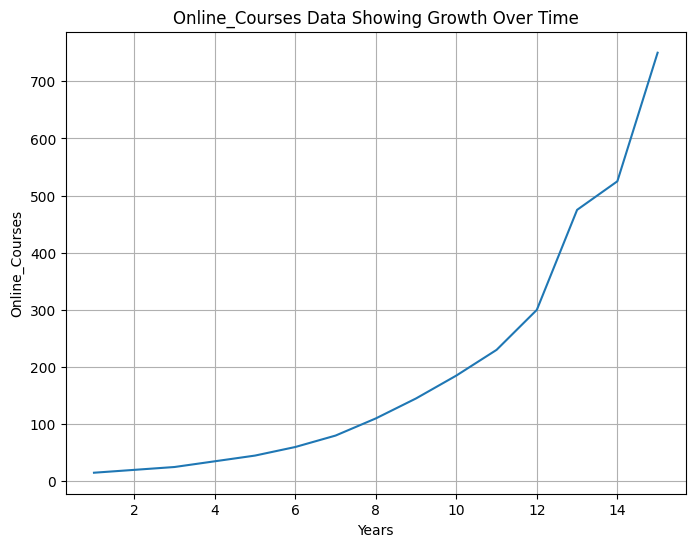

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm


given_data = {
    "Year": np.arange(1, 16),
    "Online_Courses": [15, 20, 25, 35, 45, 60, 80, 110, 145, 185, 230, 300, 475, 525, 750]
}
# Create a dataframe from the given data
df = pd.DataFrame(given_data)
print(df)
# Plot the raw data to visualize growth trends
plt.figure(figsize=(8, 6))
plt.plot(df['Year'], df['Online_Courses'])
plt.title('Online_Courses Data Showing Growth Over Time')
plt.xlabel('Years')
plt.ylabel('Online_Courses')
plt.grid(True)
plt.show()

### 2.2. Transform the Data Using Logarithm
**Task:** Apply a logarithmic transformation to the sales data

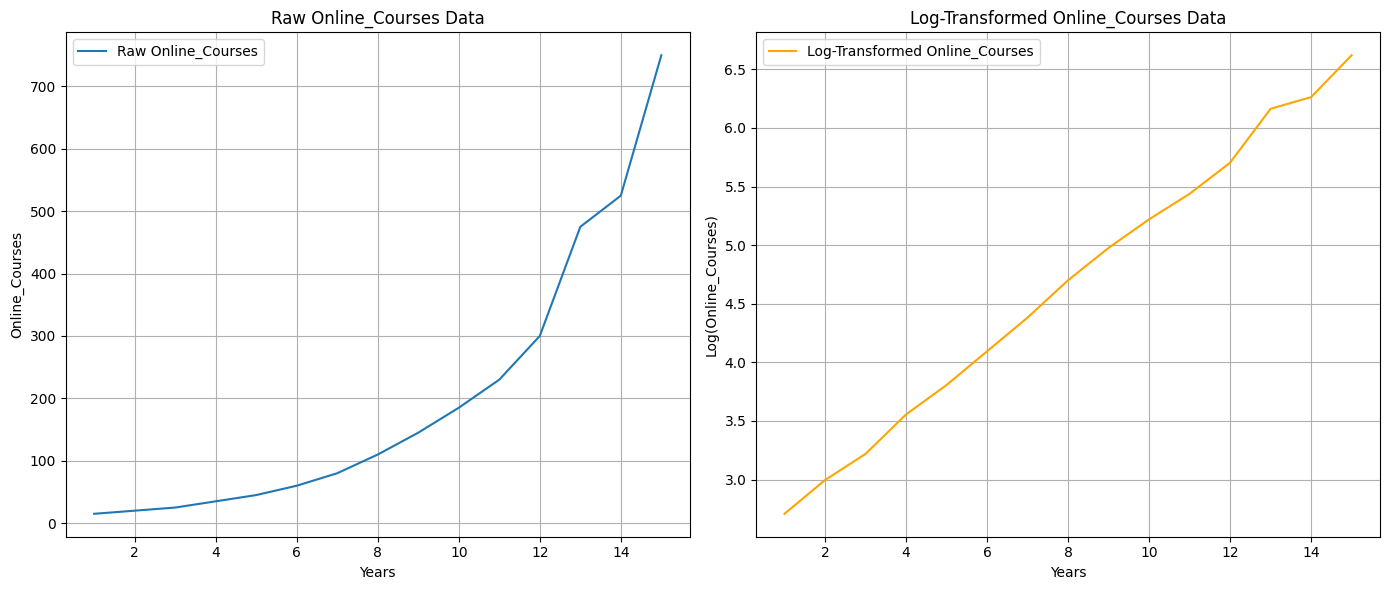

In [90]:
# Transform the Sales column using the natural logarithm (np.log)
df['Log_Online_Courses'] = np.log(df['Online_Courses'])
# Create a figure with two subplots side by side

plt.figure(figsize=(14, 6))
# Plot the raw sales data on the first subplot
plt.subplot(1, 2, 1)
plt.plot(df['Year'], df['Online_Courses'], label='Raw Online_Courses')
plt.title('Raw Online_Courses Data')
plt.xlabel('Years')
plt.ylabel('Online_Courses')
plt.grid(True)
plt.legend()

# Plot the log-transformed sales data on the second subplot
plt.subplot(1, 2, 2)
plt.plot(df['Year'], df['Log_Online_Courses'], color='orange', label='Log-Transformed Online_Courses')
plt.title('Log-Transformed Online_Courses Data')
plt.xlabel('Years')
plt.ylabel('Log(Online_Courses)')
plt.grid(True)
plt.legend()

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()



### 2.3. Fit a Linear Regression Model to the Transformed Data
**Task:** Fit a linear regression model to the logarithmically transformed sales data

In [91]:
# Use the time variable as the predictor and the log-transformed sales as the target
X_lin = df['Year']
y_lin = df['Online_Courses']
# Fit the model and plot the predicted values alongside the log-transformed sales
X_lin = sm.add_constant(X_lin)

# Fit the linear regression model
model_lin = sm.OLS(y_lin, X_lin).fit()

# Print the summary of the model
print(model_lin.summary())

                            OLS Regression Results                            
Dep. Variable:         Online_Courses   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     49.44
Date:                Tue, 01 Oct 2024   Prob (F-statistic):           8.91e-06
Time:                        02:30:21   Log-Likelihood:                -90.021
No. Observations:                  15   AIC:                             184.0
Df Residuals:                      13   BIC:                             185.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -153.0000     57.055     -2.682      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


### 2.4. Fit a Linear Regression Model to the Raw Data
**Task:** Fit a linear regression model to the raw sales data

In [92]:
# Use the same time variable and fit a model to the raw sales data

# Plot the predicted values alongside the actual raw sales data

X_log = df['Year']
y_log = df['Log_Online_Courses']
# Fit the model and plot the predicted values alongside the log-transformed sales
X_log = sm.add_constant(X_log)

# Fit the linear regression model
model_log = sm.OLS(y_log, X_log).fit()

# Print the summary of the model
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:     Log_Online_Courses   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     9124.
Date:                Tue, 01 Oct 2024   Prob (F-statistic):           6.80e-20
Time:                        02:30:23   Log-Likelihood:                 25.081
No. Observations:                  15   AIC:                            -46.16
Df Residuals:                      13   BIC:                            -44.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4266      0.027     91.459      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  res = hypotest_fun_out(*samples, **kwds)


### 2.5. Visualize and Evaluate the Model
**Task:** Evaluate the performance of both models (on transformed and raw data)

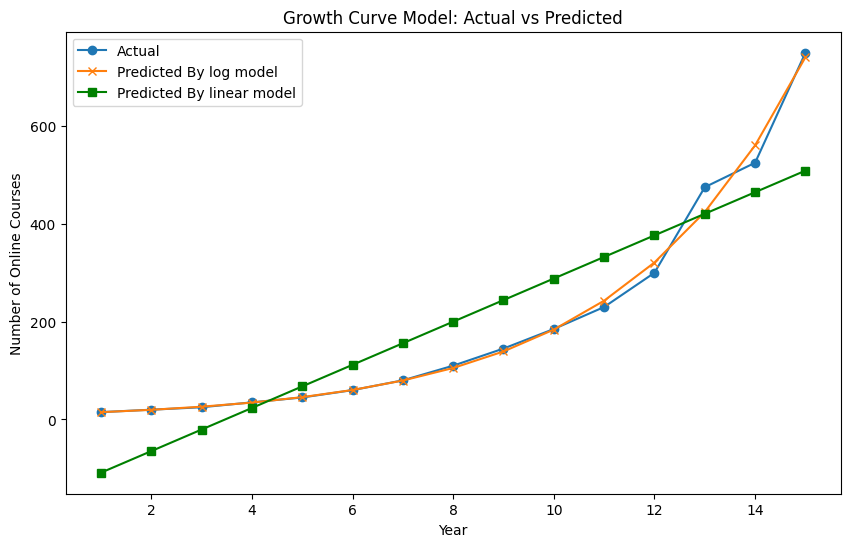

In [93]:
# Predict values using the raw model
df['Predicted_Log_Online_Courses'] = model_log.predict(X_log)
df['Predicted_Online_Courses'] = np.exp(df['Predicted_Log_Online_Courses'])
df['Predicted_Online_Courses_By_Linear'] = model_lin.predict(X_lin)
# Predict values using the log model and convert log predictions back to the original scale

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Online_Courses'], label='Actual', marker='o')
plt.plot(df['Year'], df['Predicted_Online_Courses'], label='Predicted By log model', marker='x')
plt.plot(df['Year'], df['Predicted_Online_Courses_By_Linear'], label='Predicted By linear model', marker='s', color='green')
plt.xlabel('Year')
plt.ylabel('Number of Online Courses')
plt.title('Growth Curve Model: Actual vs Predicted')
plt.legend()
plt.show()

In [94]:
# Calculate the error metrics such as Mean Absolute Error (MAE) and Mean Squared Error (MSE) for both models
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Compare which model performs better based on the error values

df['Error_Log_Model'] = df['Online_Courses'] - df['Predicted_Online_Courses']
df['Error_Linear_Model'] = df['Online_Courses'] - df['Predicted_Online_Courses_By_Linear']



# Mean Squared Error (MSE)
mse_log_model = np.mean(df['Error_Log_Model'] ** 2)
mse_linear_model = np.mean(df['Error_Linear_Model'] ** 2)

# Mean Absolute Error (MAE)
mae_log_model = np.mean(np.abs(df['Error_Log_Model']))
mae_linear_model = np.mean(np.abs(df['Error_Linear_Model']))


print(f"MAE Log: {mae_log_model:.8f}")
print(f"MSE Log: {mse_log_model:.8f}")
print("-" * 50)
print(f"MAE Raw: {mae_linear_model:.2f}")
print(f"MSE Raw: {mse_linear_model:.2f}")


MAE Log: 9.63002348
MSE Log: 306.63991013
--------------------------------------------------
MAE Raw: 82.87
MSE Raw: 9555.71
